<a href="https://colab.research.google.com/github/mainak555/lb-ai/blob/ai/Assignment01_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from sklearn.datasets import load_boston
boston = load_boston()
print("\
Keys: {}\n\
Data Shape: {}\n\
Type: {} [{}D]\n\
Feature Names: {}\n\
Description: {}\
".format(boston.keys(), boston.data.shape, 
    type(boston.data), boston.data.ndim,
    boston.feature_names, boston.DESCR))

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Data Shape: (506, 13)
Type: <class 'numpy.ndarray'> [2D]
Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Description: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occ

In [68]:
import numpy as np
import pandas as pd
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [69]:
df['price'] = boston.target
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

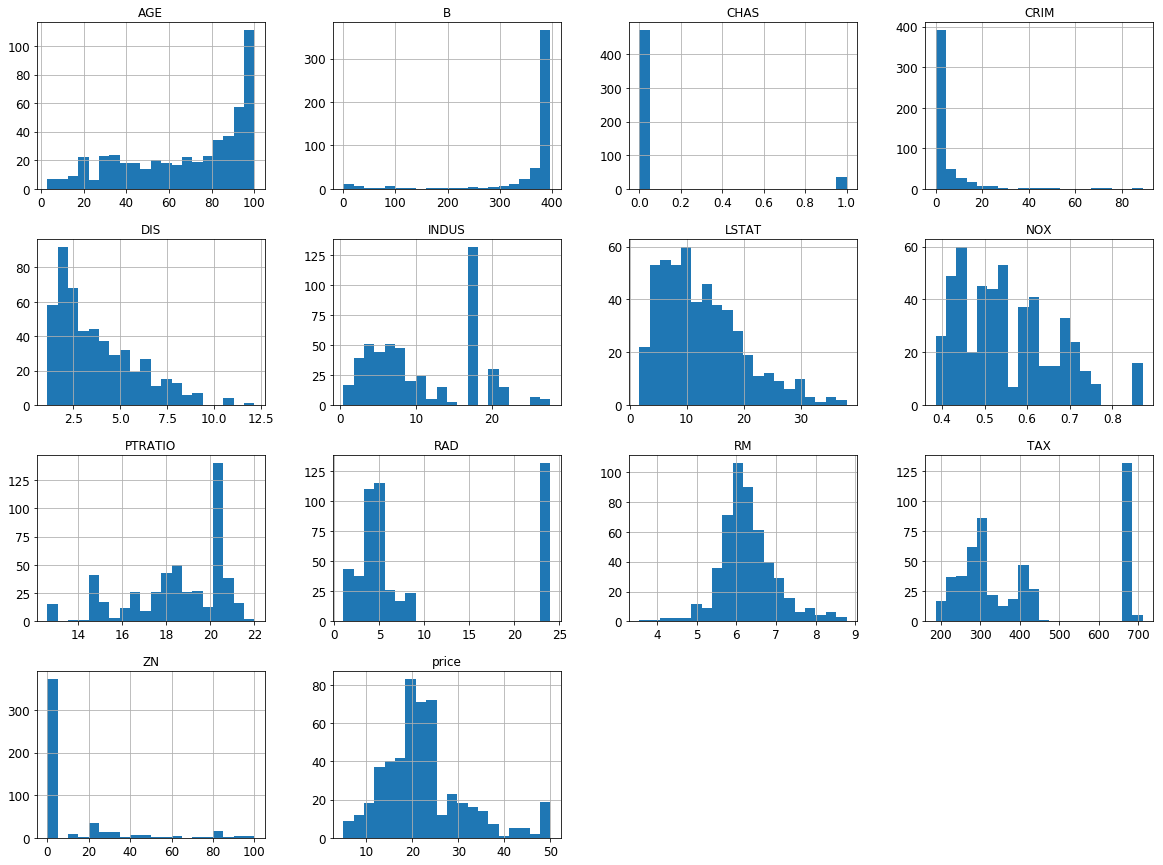

In [71]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
plt.show()

In [72]:
corr_matrix = df.corr()
corr_matrix[df.columns].style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
INDUS,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
CHAS,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
NOX,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
AGE,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


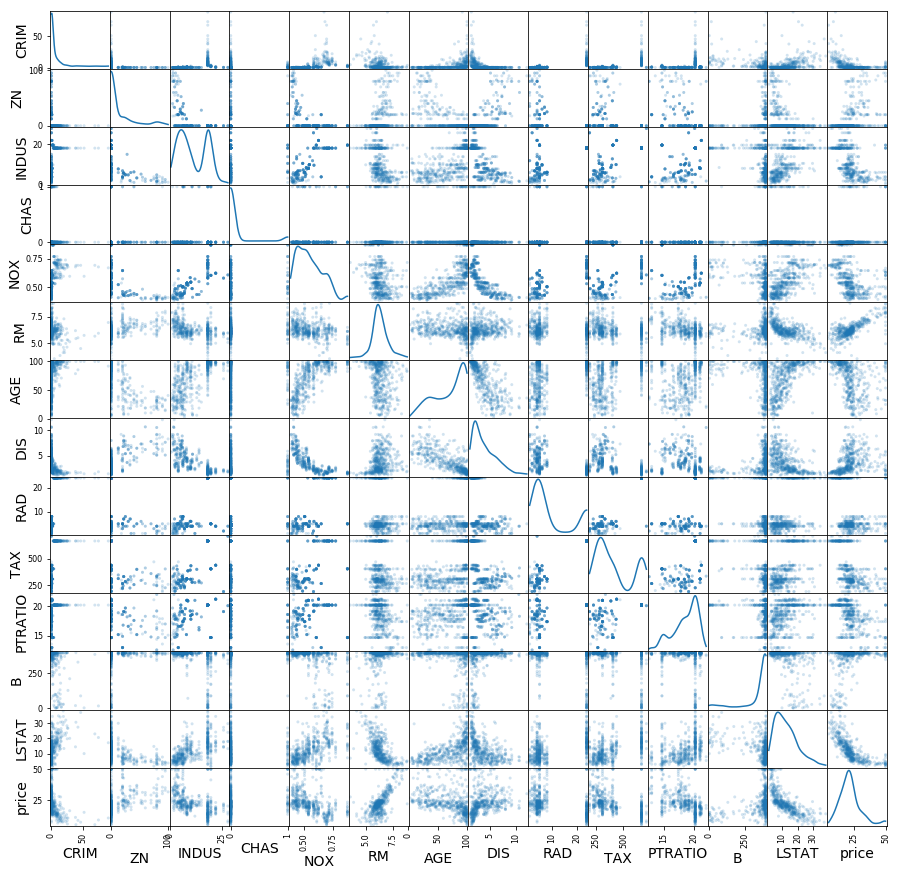

In [73]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[df.columns], figsize=(15,15), alpha=0.2, diagonal='kde')
plt.show()

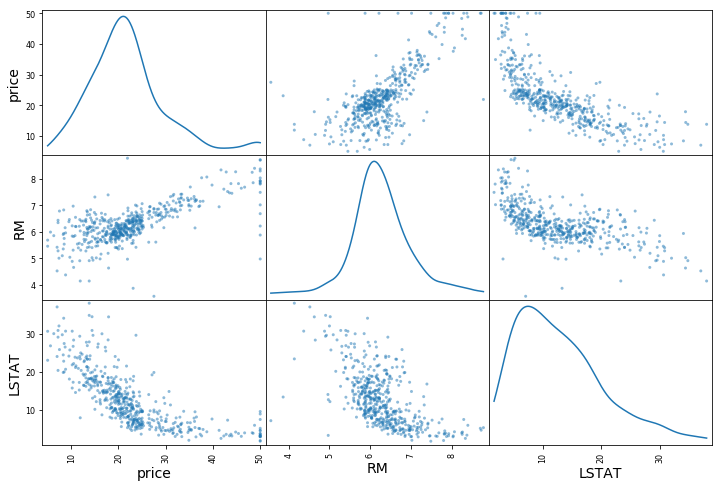

In [74]:
scatter_matrix(df[['price', 'RM', 'LSTAT']], figsize=(12,8), diagonal='kde')
plt.show()

In [75]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x: test_set_check(x, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

df_with_id = df.reset_index()
train, test = split_train_test_by_id(df_with_id, 0.2, 'index')
print('Train: {}, Test: {}'.format(len(train), len(test)))

Train: 404, Test: 102


In [0]:
'''Functions
f(x) = thita0*x0 + thita1*x1 + thita2*x2 + .... + thitaN*xN
     = [thita0, theta1,...thetaN]*[x0 = 1
                                   x1
                                   .
                                   .
                                   xN]
'''
class LinearRegression:    
    def __init__(self, alpha = 0.0001, iteration = 10000, verbose = (True, 1000)):
        self.alpha = alpha
        self.iteration = iteration
        self.verbose = verbose
        self.theta = np.ndarray
        self.cost = np.ndarray
        #self.cost = np.empty((0, 0), int)

    def print_(self, text, skip=True):        
        if(self.verbose[0] and not skip):
            print(text)

    def hx(self, theta, X, n):
        m = X.shape[0]                              #Nos. of Records/Rows
        fx = np.ones((m, 1))                        #initializing with 1 for all rows
        theta = theta.reshape(1, n+1)               #[theta0....thetaN]
        for i in range(0, m):
            fx[i] = float(np.matmul(theta, X[i]))   #theta.T * X        
        fx = fx.reshape(m)    
        return fx
    
    def gradient_descent(self, theta, h, X, y, n):
        w = np.random.randn(2)
        iteration_count = 0
        m = X.shape[0]
        self.cost = np.ones(self.iteration)
        for i in range(0, self.iteration):
        #i=0
        #while True:
            if(iteration_count >= self.verbose[1]):
                iteration_count = 0 
            else:
                iteration_count += 1
                
            theta[0] = theta[0] - (self.alpha/m) * sum(h - y)
            for j in range(1, n+1):
                theta[j] = theta[j] - (self.alpha/m) * sum((h - y) * X.T[j])
            h = self.hx(theta, X, n)
            self.cost[i] = (1/m) * 0.5 * sum(np.square(h - y))
            self.print_('Cost/Iteration[{}]: {}'.format(i, self.cost[i]), not(iteration_count >= self.verbose[1]))
            i +=1
        self.theta = theta.reshape(1, n+1)
        
    def fit(self, X, y, algo='gradient_descent'):
        n = X.shape[1]                              #Nos. of Features [x1....xN]
        m = X.shape[0]                              #no. of Rows/Records
        x0 = np.ones((m, 1))
        x = np.concatenate((x0, X), axis = 1)       #New Vector X: [x0, x1...xN]
        theta = np.zeros(n+1)                       #Initialize theta: [theta0...thetaN]
        fx = self.hx(theta, x, n)
        self.print_('Initial h(x):\n{}'.format(fx))
        self.gradient_descent(theta, fx, x, y, n)        
        return self.theta

    def predict(self, X):
        n = X.shape[1]
        m = X.shape[0]
        x0 = np.ones((m, 1))
        x = np.concatenate((x0, X), axis = 1)
        y_pred = self.hx(self.theta, x, n)
        self.print_('Predicted y:\n{}'.format(y_pred))
        return y_pred  
      
#%%
def RMSE(y_pred, y_actual):
    squared_err = (y_pred - y_actual) ** 2
    mse = np.mean(squared_err)
    return np.sqrt(mse)

def featureScaling(X_train):
    n = X_train.shape[1]
    m = X_train.shape[0]
    mean = np.ones(n)
    std = np.ones(n)
    for i in range(0, n-1):
        mean[i] = np.mean(X_train.T[i])
        std[i] = np.std(X_train.T[i])
        for j in range(0, m-1):
            X_train.iloc[j][i] = (X_train.iloc[j][i] - mean[i]) / std[i]
    return X_train

In [77]:
trained_scaled = featureScaling(train[['RM', 'LSTAT']])
lm = LinearRegression(iteration=50000, verbose=(True, 2000))
#lm.fit(train[['RM', 'LSTAT']], train['price'])
lm.fit(trained_scaled, train['price'])
print('Thetas: {}'.format(lm.theta))

Cost/Iteration[1999]: 114.91147113198068
Cost/Iteration[4000]: 88.3850968870477
Cost/Iteration[6001]: 72.04611603305663
Cost/Iteration[8002]: 61.792011920315915
Cost/Iteration[10003]: 55.18061211503879
Cost/Iteration[12004]: 50.75778392943279
Cost/Iteration[14005]: 47.65737263439099
Cost/Iteration[16006]: 45.363139944047674
Cost/Iteration[18007]: 43.56710213275719
Cost/Iteration[20008]: 42.08523159166964
Cost/Iteration[22009]: 40.80729302066682
Cost/Iteration[24010]: 39.666991765752385
Cost/Iteration[26011]: 38.624209115394514
Cost/Iteration[28012]: 37.6544300899977
Cost/Iteration[30013]: 36.742451231014094
Cost/Iteration[32014]: 35.878635284925615
Cost/Iteration[34015]: 35.05668148219854
Cost/Iteration[36016]: 34.27229772604067
Cost/Iteration[38017]: 33.52240951089007
Cost/Iteration[40018]: 32.80468826559563
Cost/Iteration[42019]: 32.117269810555165
Cost/Iteration[44020]: 31.458585979863525
Cost/Iteration[46021]: 30.827263617892086
Cost/Iteration[48022]: 30.222063700818406
Thetas: [[1

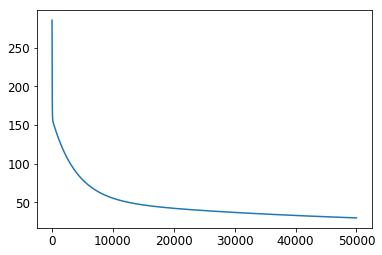

In [78]:
iterations = np.arange(lm.iteration)
plt.plot(iterations, lm.cost.tolist())
plt.show()

In [79]:
y_pred = lm.predict(test[['RM', 'LSTAT']])
print('RMSE: {}'.format(RMSE(y_pred, test['price'])))

RMSE: 44.07250521864541


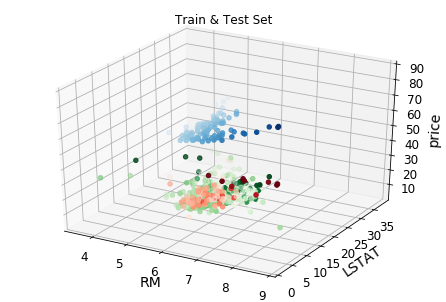

In [80]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
axis_x_train = list(train['RM'].T)
axis_y_train = list(train['LSTAT'].T)
axis_z_train = list(train['price'])

fig = mpl.pyplot.figure()
#fig = mpl.pyplot.figure(figsize=(8, 20))

ax = Axes3D(fig)
#ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.scatter(axis_x_train, axis_y_train, axis_z_train, c=axis_z_train, cmap='Greens')
#ax.set_xlabel('RM')
#ax.set_ylabel('LSTAT')
#ax.set_zlabel('price')
#ax.set_title('Train Set')

axis_x_test = list(test['RM'].T)
axis_y_test = list(test['LSTAT'].T)
axis_z_test = list(test['price'])

ax.scatter(axis_x_test, axis_y_test, axis_z_test, c=axis_z_test, cmap='Reds')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('price')
ax.set_title('Train & Test Set')
#plt.show()

ax.scatter(axis_x_test, axis_y_test, y_pred, c=y_pred, cmap='Blues')
plt.show()